# Introduction

**TODO**
- [ ] Load all images using cv2 instead of io ?
- [x] Test other rotation algorithms
- [ ] Allow to modify samples that are not well rectified after checking 
- [ ] Scaling
- [ ] **Imporve matching (taking into consideration multiple anchors)**
- [ ] Add other matching techniques
- [ ] Clean and comment functions
- [ ] **Detremine how to store the orientations + scaling + relative positions**


**Table of Contents**
* [Preliminary imports](#imports)
* [Rectifications](#rectification)
* [Matching](#matching)

# Imports <a class="anchor" id="imports"></a>

In [1]:
from innotation_functions import *

In [2]:
from cadastre_matching import *

In [3]:
import os

If the images are already rectified, you can jump to [matching](#matching), otherwise do the [rectifications](#rectification).

# Rectifications <a class="anchor" id="rectification"></a>

## Initialization

In [4]:
PATH_TO_REORIENT = "../1881_Lille/"
img_ext = ".jpg"

new_filename_prefix = "Lille_1881_"

reorient_input = True
rename_input = True
rescale_input = False

In [5]:
flnms = os.listdir(PATH_TO_REORIENT)
flnms = [fln for fln in flnms if fln.endswith(img_ext)]

# REDUCE FOR TESTING
flnms = [fln for fln in flnms[:3] if fln.endswith(img_ext)]


images = [cv2.imread(PATH_TO_REORIENT+im) for im in flnms]

## Innotation

In [6]:
innotater_rect, targets_rect = innotate_rectification(images
                                    , flnms
                                    , reorient = reorient_input
                                    , rename = rename_input
                                    , rescale = rescale_input
                                   )

In [7]:
display(innotater_rect)

Innotater(children=(VBox(children=(VBox(children=(Text(value='20f365ad-314b-4e7e-b67e-893fd1f4ba7e.jpg', disab…

## Transformation

In [8]:
selected_images, selected_targets = perform_selection(targets_rect
                                                      , images
                                                      , flnms
                                                      , rename = rename_input
                                                     )

In [9]:
%%time
if reorient_input:
    rotation_angles = orientation_angles(targets_orient=selected_targets[2])
    selected_images = rotate_images(images=selected_images, orientation_angles=rotation_angles)

CPU times: user 1.8 s, sys: 291 ms, total: 2.09 s
Wall time: 305 ms


## Check task completed ?

In [10]:
innotater_checking, targets_checking = innotate_rectification(images=selected_images
                                                              , flnms=selected_targets[1]
                                                              , reorient = False
                                                              , rename = False
                                                              , rescale = False
                                                              , exclude_name = "Not correctly rectified"
                                                             )

In [11]:
display(innotater_checking)

Innotater(children=(VBox(children=(VBox(children=(Text(value='B2', disabled=True), ImagePad(value=b'\x89PNG\r\…

In [12]:
to_be_recomputed = targets_checking[0]==1

In [13]:
if to_be_recomputed.any():
    innotater_recomputed, targets_recomputed = innotate_rectification(images=selected_images
                                                                      , flnms=selected_targets[1]
                                                                      , reorient = reorient_input
                                                                      , rename = rename_input
                                                                      , rescale = rescale_input
                                                                      , exclude_name = "Exclude"
                                                                      , ind_to_compute = to_be_recomputed
                                                                     )
    display(innotater_recomputed)

In [14]:
if to_be_recomputed.any():
    # np.where for other targets
    selected_images_test = [im if (np.sum(targ_reNorth)==0) 
                        else rotate_images(images=[im]
                                           , orientation_angles=orientation_angles([targ_reNorth])
                                          )[0]
                        for im, targ_reNorth in zip(selected_images, targets_recomputed[2])
                       ]

## Save rectified images

In [29]:
SAVE_RECTIFIED = False
SAVE_RECTIFIED_EDGES = False

In [36]:
if SAVE_RECTIFIED:
    save_rectified_images(path=PATH_TO_REORIENT+"rectified/"
                          , rectified_images=selected_images
                          , rectified_flnms=selected_targets[1]
                          , new_filename_prefix=new_filename_prefix
                          , img_ext=img_ext
                         )

In [37]:
if SAVE_RECTIFIED_EDGES:
    edges = [cv2.Canny(im,220,256) for im in selected_images]
    save_rectified_images(path=PATH_TO_REORIENT+"rectified_edges/"
                          , rectified_images=edges
                          , rectified_flnms=selected_targets[1]
                          , new_filename_prefix=new_filename_prefix
                          , img_ext=img_ext
                         )

# Matching <a class="anchor" id="matching"></a>

## Initialization

In [15]:
FOLDER_ANNOT = PATH_TO_REORIENT+"rectified/"#'../1811_La Rochelle/rectified/'
FOLDER_COMPOSE = PATH_TO_REORIENT+"rectified/"[:-1]+"_edges/"#'../1811_La Rochelle/rectified_edges/'
FOLDER_MATCH = PATH_TO_REORIENT+"rectified/"#'../1811_La Rochelle/rectified/'

In [16]:
img_prefix = new_filename_prefix#'LaRochelle_1811_'

In [17]:
img_ext = img_ext#".jpeg"#".jpg"

## Matching process

/Users/nmm/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:2834: DecompressionBombWarning: Image size (91422135 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


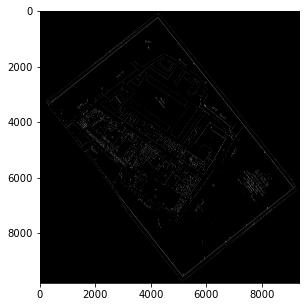

In [18]:
big_dict, big_compo = initialize_compositon(init_label="A1"
                                            , path=FOLDER_COMPOSE+img_prefix
                                            , img_ext=img_ext
                                            , annot=False
                                           )

In [19]:
# ANCHOR: must already be on the composition/in the dictionnary
# TARGET: to be matched with the anchor

In [20]:
anchor_label, target_label = initialize_match()

Anchor cadaster label:  A1
Target cadaster label:  A2


In [21]:
inw, targets = innotater_init(anchor_label
                              , target_label
                              , path=FOLDER_ANNOT+img_prefix
                              , im_ext=img_ext
                             )
display(inw)

Innotater(children=(VBox(children=(VBox(children=(HBox(children=(ImagePad(value=b'\xff\xd8\xff\xe0\x00\x10JFIF…

/Users/nmm/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:2834: DecompressionBombWarning: Image size (93273939 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


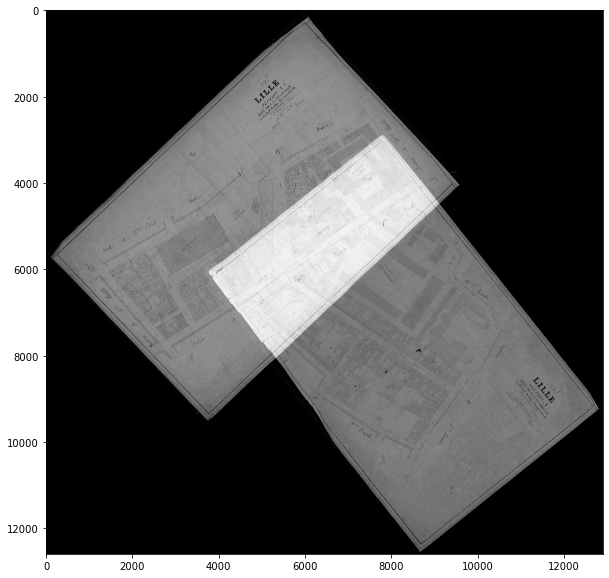

Is it OK?


 n


TO BE DISCARDED


In [22]:
prev_big_compo = big_compo
prev_big_dict = big_dict

big_compo, big_dict = test_match_grow(targets
                                      , big_compo=big_compo
                                      , big_dict=big_dict
                                      , path=FOLDER_MATCH+img_prefix
                                      , anchor_label=anchor_label
                                      , target_label=target_label
                                      , img_ext=img_ext
                                      , path_compose = FOLDER_COMPOSE+img_prefix
                                      , annot=False
                                     )

In [35]:
big_dict.keys()

dict_keys(['A1', 'A2', 'A3', 'A5', 'B3', 'A4'])

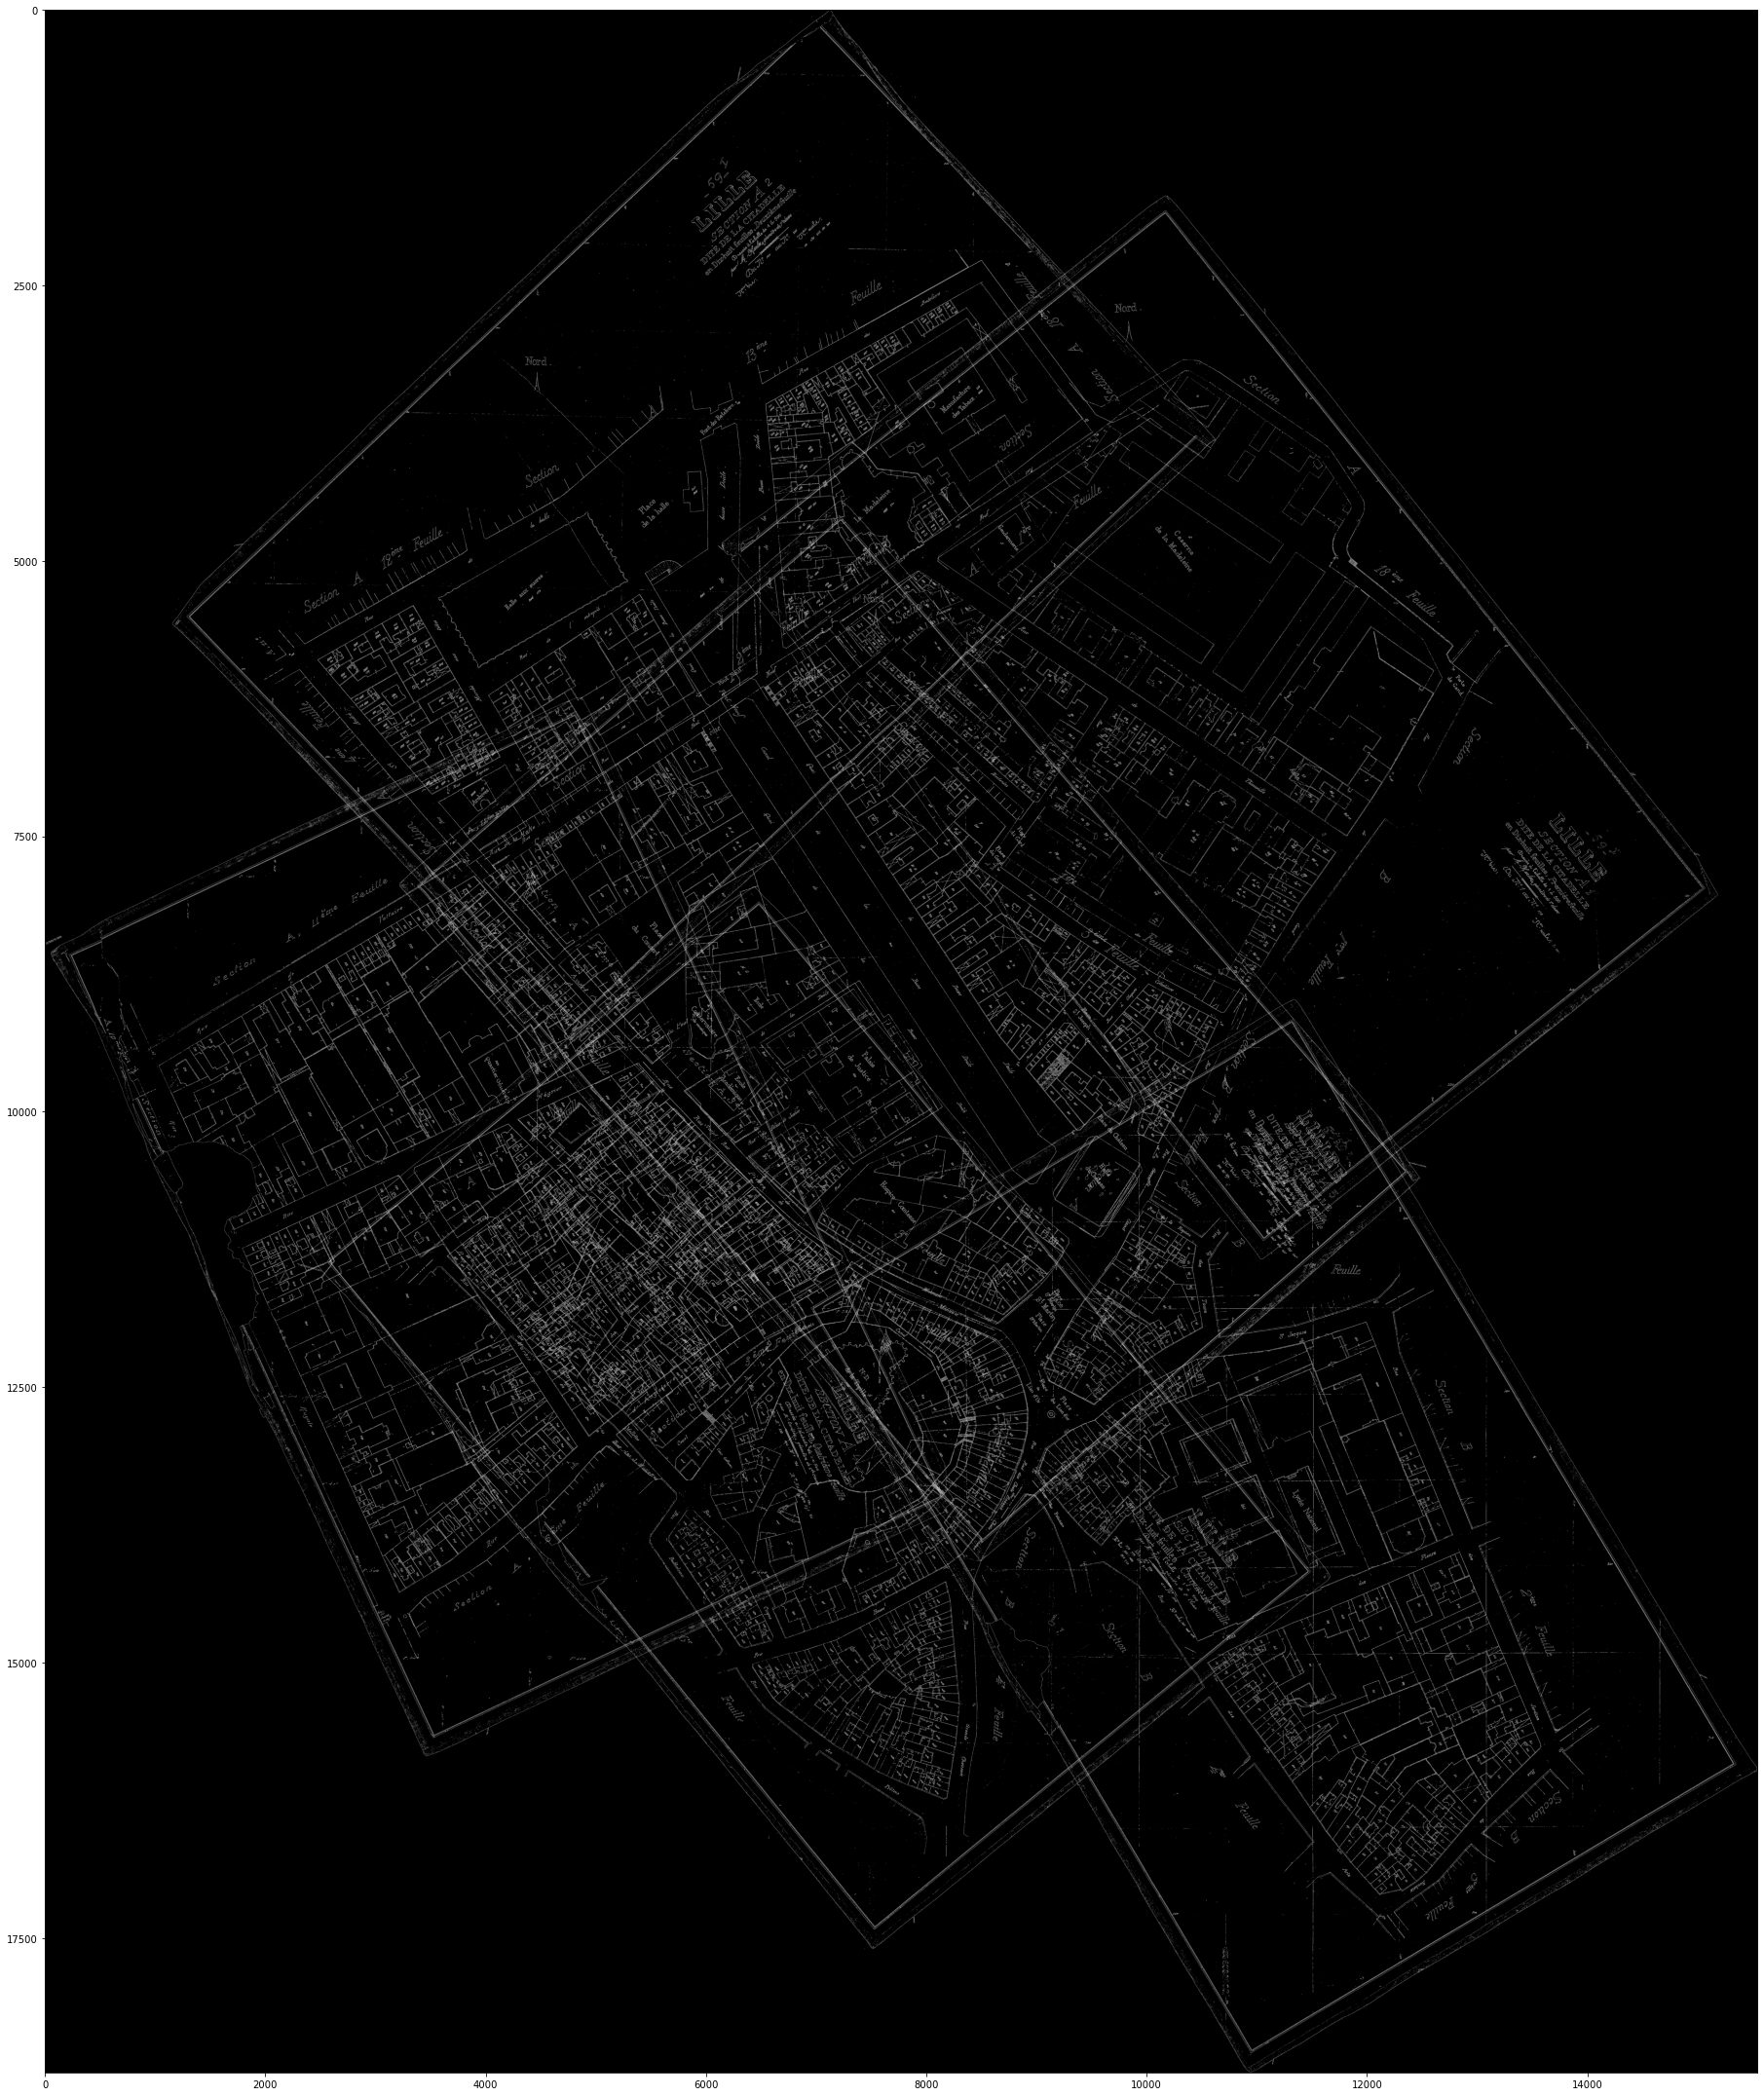

In [39]:
big_compo_cleaned = np.where(big_compo>245, 255, 0)

plt.figure(figsize=(30,30))
plt_plot_cv2(big_compo_cleaned)
plt.tight_layout()
#plt.savefig(FOLDER_COMPOSE+"interactive_growth_{}.png".format(len(big_dict)))#, dpi=256)
plt.show()